# Audi China Hypothetical Case Study
### May 29th, 2019     Xinzhu Li




#### Problem: Unusual brake system alert happened 
#### Task: predict the problem  and find possible root causes

<img src="audi.jpg" width="800">

## 1. Data Preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('dataset.csv',parse_dates=['timestamp'])
pd.set_option('display.max_columns', None) 
dataset.head()

,vin,timestamp,ActTransmissionGearLeverPos,B2V_MaxCellVoltage,B2V_MinCellVoltage,CrankshaftSpeed,DC_DC_Sts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,InsulationResistance,MaxTemp,MinTemp,TotalVehicleDistance,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,engine_state,EMsts,EMControlTmp,EMRotation,EMTorque,EMTemp,EMVoltage,EMBusCurrentFlow,geo_status,BrakeSystemAlarm
0,car_id_1,2018-02-08 14:47:18,D,3.599,3.595,0,1,0.26,9,374.0,8625,21,20,108.0,0,3,1,1,6.1,1,2,1,21,941,22.0,18,374.0,7.3,NaN,0
1,car_id_1,2018-02-08 14:47:48,D,3.596,3.593,0,1,0.25,9,373.5,8980,21,20,108.0,0,3,0,1,9.2,1,2,1,22,1015,17.0,19,373.5,6.5,stationary,0
2,car_id_1,2018-02-08 14:48:18,D,3.553,3.548,0,1,0.25,35,368.0,8370,21,20,108.0,0,3,1,1,23.6,1,2,1,21,1180,87.0,20,368.3,34.3,stationary,0
3,car_id_1,2018-02-08 14:48:48,D,3.547,3.528,0,1,0.23,7,370.8,8830,21,20,108.0,0,3,1,1,41.3,1,2,4,23,1637,0.0,23,371.0,0.5,stationary,0
4,car_id_1,2018-02-08 14:49:18,D,3.346,3.321,0,1,0.22,197,338.8,7930,21,20,109.0,0,3,1,1,39.9,1,2,1,27,2967,184.3,28,338.0,187.0,stationary,0


In [3]:
dataset.shape

(16521, 30)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16521 entries, 0 to 16520
Data columns (total 30 columns):
vin                            16521 non-null object
timestamp                      16521 non-null datetime64[ns]
ActTransmissionGearLeverPos    16521 non-null object
B2V_MaxCellVoltage             16521 non-null float64
B2V_MinCellVoltage             16521 non-null float64
CrankshaftSpeed                16521 non-null int64
DC_DC_Sts                      16521 non-null int64
EVehBatSOC                     16521 non-null float64
EVehTotalFlow                  16521 non-null int64
EVehTotalVol                   16521 non-null float64
InsulationResistance           16521 non-null int64
MaxTemp                        16521 non-null int64
MinTemp                        16521 non-null int64
TotalVehicleDistance           16521 non-null float64
VehBrakeSts                    16521 non-null int64
VehChargingSts                 16521 non-null int64
VehDriveSts                    16521 n

In [5]:
dataset.describe()

,B2V_MaxCellVoltage,B2V_MinCellVoltage,CrankshaftSpeed,DC_DC_Sts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,InsulationResistance,MaxTemp,MinTemp,TotalVehicleDistance,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,engine_state,EMsts,EMControlTmp,EMRotation,EMTorque,EMTemp,EMVoltage,EMBusCurrentFlow,BrakeSystemAlarm
count,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000,16521.000000
mean,3.726645,3.719044,331.433448,1.225168,0.438590,192.867441,313.846050,6644.896193,22.306761,21.312875,246.194189,0.126687,50.916712,0.170873,50.113371,723.918764,1.532776,1.741844,3.611706,18.732522,-1318.179953,-45.049392,30.773682,368.123479,-99.971521,0.028570
std,0.205342,0.205917,608.290745,0.417706,4.428005,394.043154,154.300597,3911.680206,8.718969,8.737661,285.360165,0.332632,99.078647,0.376410,99.956657,6783.180218,0.765023,0.437634,10.915835,30.475866,5122.369521,1920.604838,42.233145,1904.147004,205.638280,0.166599
min,0.000000,0.000000,0.000000,1.000000,0.000000,-93.000000,0.000000,0.000000,-40.000000,-40.000000,-0.200000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-40.000000,-10000.000000,-511.000000,-40.000000,0.000000,-1000.000000,0.000000
25%,3.549000,3.543000,0.000000,1.000000,0.010000,-2.000000,364.300000,6465.000000,20.000000,19.000000,32.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,21.000000,0.000000,-35.800000,19.000000,364.000000,-11.300000,0.000000
50%,3.695000,3.687000,0.000000,1.000000,0.260000,0.000000,374.500000,7815.000000,23.000000,22.000000,136.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,31.000000,0.000000,0.000000,33.000000,374.300000,0.000000,0.000000
75%,3.889000,3.883000,750.000000,1.000000,0.760000,13.000000,404.800000,8885.000000,27.000000,26.000000,505.000000,0.000000,3.000000,0.000000,2.000000,12.600000,2.000000,2.000000,4.000000,37.000000,1032.000000,0.000000,57.000000,404.300000,0.000000,0.000000
max,4.099000,4.095000,5167.000000,2.000000,254.000000,1000.000000,427.000000,65535.000000,40.000000,39.000000,971.000000,1.000000,254.000000,1.000000,255.000000,65534.000000,3.000000,2.000000,255.000000,254.000000,65535.000000,65534.000000,254.000000,65534.000000,247.300000,1.000000


In [6]:
dataset.vin.unique()

array(['car_id_1', 'car_id_2', 'car_id_3', 'car_id_4', 'car_id_5',
       'car_id_6', 'car_id_7', 'car_id_8', 'car_id_9', 'car_id_10',
       'car_id_11', 'car_id_12', 'car_id_13', 'car_id_14', 'car_id_15'],
      dtype=object)

In [7]:
dataset[dataset.BrakeSystemAlarm==1].vin.unique()

array(['car_id_1', 'car_id_4', 'car_id_5', 'car_id_7', 'car_id_8',
       'car_id_9', 'car_id_10', 'car_id_11', 'car_id_14', 'car_id_15'],
      dtype=object)

#### Summary: 
Dataset has 15 unique vehicle, 12 of them had brake system alert, 80%
Dataset has both categorical and numerica variables

Next step is checking data quality

In [8]:
dataset.isnull().sum()

vin                              0
timestamp                        0
ActTransmissionGearLeverPos      0
B2V_MaxCellVoltage               0
B2V_MinCellVoltage               0
CrankshaftSpeed                  0
DC_DC_Sts                        0
EVehBatSOC                       0
EVehTotalFlow                    0
EVehTotalVol                     0
InsulationResistance             0
MaxTemp                          0
MinTemp                          0
TotalVehicleDistance             0
VehBrakeSts                      0
VehChargingSts                   0
VehDriveSts                      0
VehRunMode                       0
VehicleSpeed                     0
VehicleStatus                    0
engine_state                     0
EMsts                            0
EMControlTmp                     0
EMRotation                       0
EMTorque                         0
EMTemp                           0
EMVoltage                        0
EMBusCurrentFlow                 0
geo_status          

In [14]:
print ("Brake Alarm data is about {:0%} to total data" .format(dataset[dataset.BrakeSystemAlarm==1].shape[0]/dataset.shape[0]))

Brake Alarm data is about 2.856970% to total data


In [18]:
print ("Brake Alarm data is about {:0%} to total in missing data " .
format(dataset[(dataset.BrakeSystemAlarm==1)&(pd.isnull(dataset.geo_status))].shape[0]/dataset[pd.isnull(dataset.geo_status)].shape[0]))

Brake Alarm data is about 2.371542% to total in missing data 


#### missing data is nearly random distributed among Brake Alert, so remove missing values

In [19]:
dataset=dataset.dropna()

Create some variables

In [20]:
# create B2V gap using Max and Min values
dataset['B2V_gap']=dataset['B2V_MaxCellVoltage']-dataset['B2V_MinCellVoltage']
#create Temperature using Max and Min values
dataset['Temp_gap']=dataset['MaxTemp']-dataset['MinTemp']

# create time interval in seconds 
dataset['timediff']=dataset.groupby('vin').timestamp.diff()
dataset['timediff']=dataset['timediff'].apply(lambda x: np.nan if pd.isnull(x) else x.seconds)
dataset['date']=dataset['timestamp'].apply(lambda x:x.date())

In [21]:
cat_col=['ActTransmissionGearLeverPos','DC_DC_Sts','VehBrakeSts','VehChargingSts','VehDriveSts', 'VehRunMode','VehicleStatus',
             'engine_state','EMsts', 'geo_status']
num_col=[ 'B2V_MaxCellVoltage', 'B2V_MinCellVoltage', 'CrankshaftSpeed',  'EVehBatSOC', 'EVehTotalFlow',
          'EVehTotalVol', 'InsulationResistance', 'MaxTemp','MinTemp', 'TotalVehicleDistance',
          'VehicleSpeed', 'EMControlTmp', 'EMRotation', 'EMTorque', 'EMTemp', 'EMVoltage', 'EMBusCurrentFlow']
print("There are {} categorical varibales".format(len(cat_col)))
print("There are {} numerical varibales".format(len(num_col)))

There are 10 categorical varibales
There are 17 numerical varibales


## 2. EDA

It showed some outliers in certain variables when Brake Alert=0, I will remove these outliers to make future model more robust

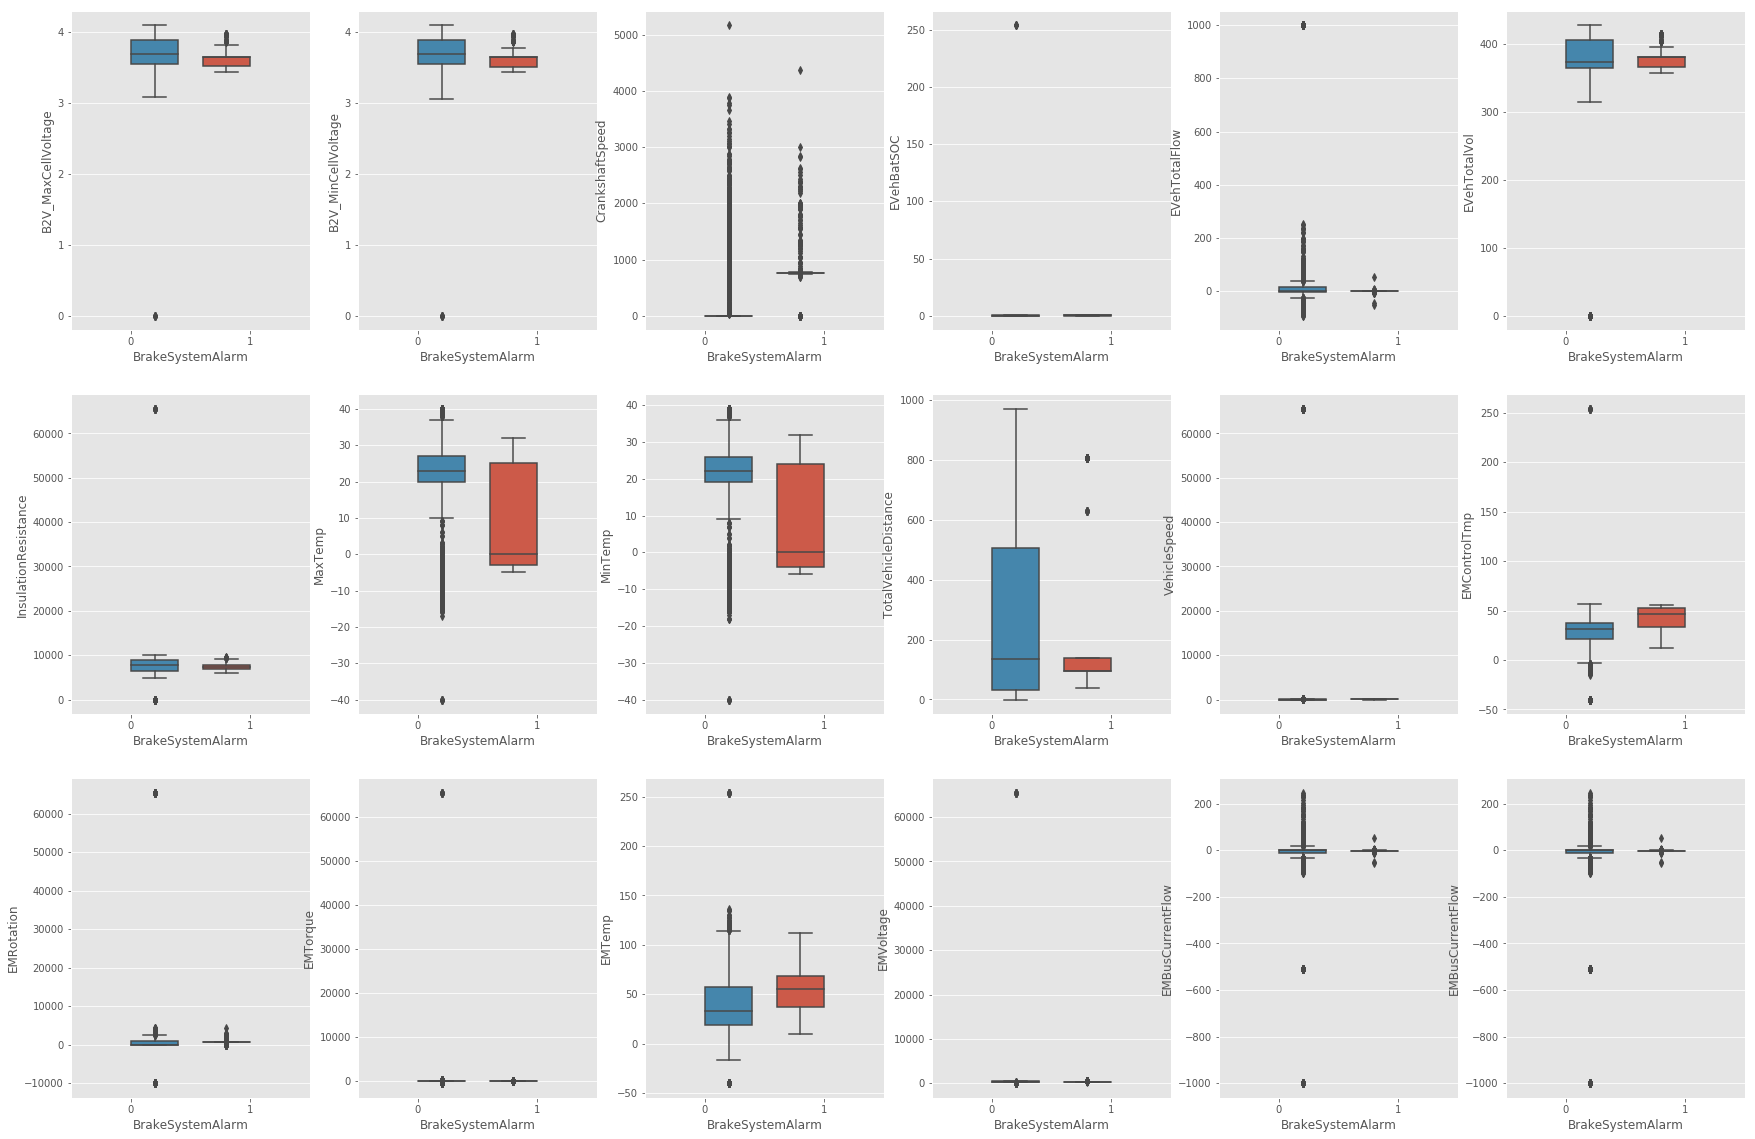

In [31]:
fig,ax=plt.subplots(ncols=6,nrows=3,figsize=(30,20))
i=0
for j in ax.flatten():
    k=min(i,16)
    g=sns.boxplot(x='BrakeSystemAlarm',y=num_col[k],data=dataset,ax=j,hue='BrakeSystemAlarm',hue_order=[1,0])
    g.legend_.remove()
    i=i+1

In [32]:
#outlier
dataset=dataset[dataset['VehicleSpeed']<=140]
dataset=dataset[dataset['EMControlTmp']<=250]
dataset=dataset[dataset['EMRotation']<=60000]
dataset=dataset[(dataset['EMTorque']<=60000)&(dataset['EMTorque']>-500)]
dataset=dataset[dataset['InsulationResistance']<=60000]fig,ax=plt.subplots(ncols=6,nrows=3,figsize=(30,30))


Explore relationship between Brake Alert and categorical variables

### Find 1: Brake Alert only happened when DC_DC_Sts=1, Vehicle Status=1, ChargingSts=3

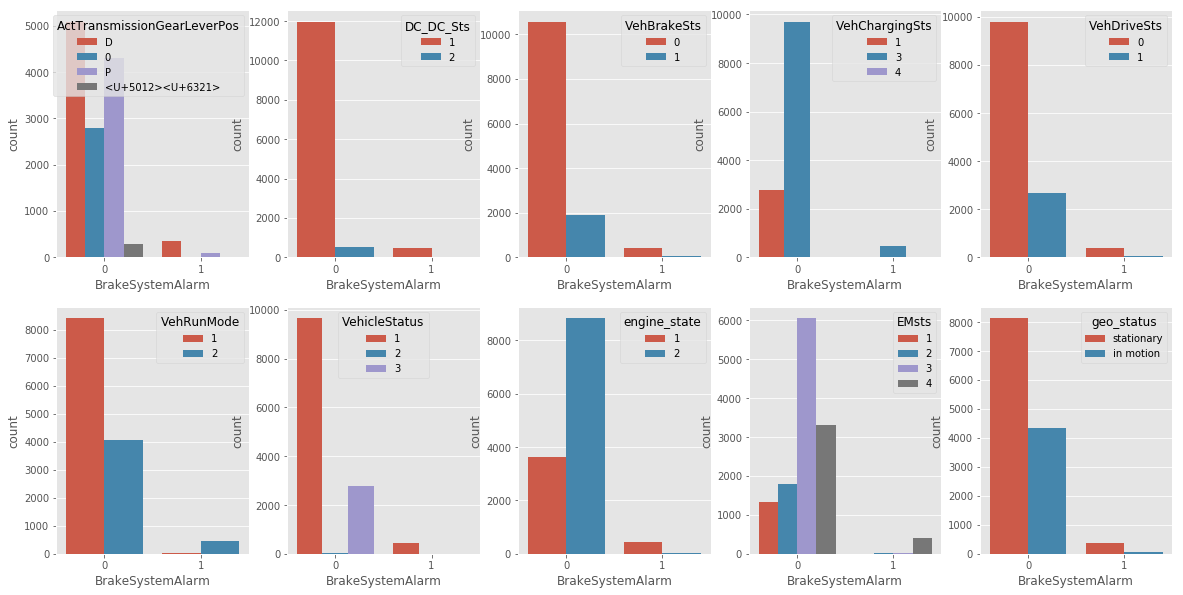

In [37]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
i=0
for j in ax.flatten():
    sns.countplot(x='BrakeSystemAlarm',hue=cat_col[i],data=dataset,ax=j)
    i=i+1    

Explore the correlation between numerical variables:

B2V_Max and B2V_Min are highly correlated, so do Max_temp and Min_temp,
EVehTotalFlow is highly related to B2V values and EMBusCurrentFlow

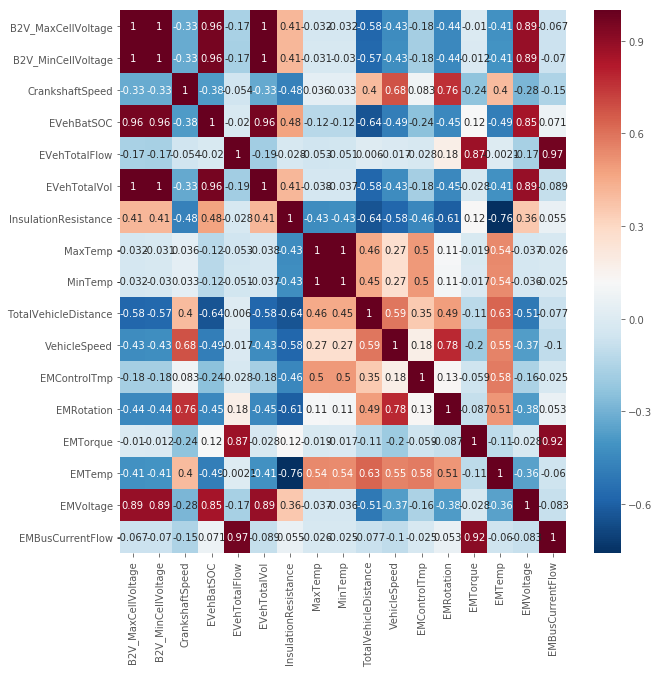

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[num_col].corr(),annot=True,cmap = "RdBu_r")

Correlation among variables may change when vehicle is not functional
Below shows correlation matrix when Brake Alert=0 and 1 seperataly, and heatmap of the absolute values of difference 

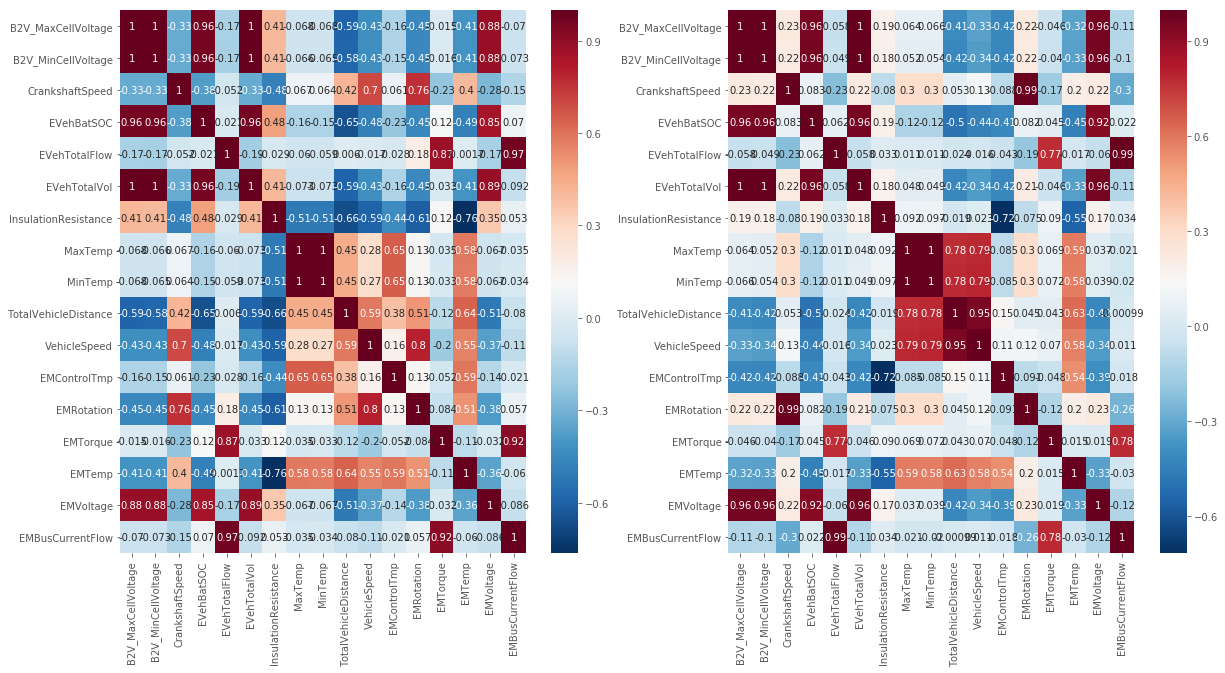

In [43]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(20,10))
sns.heatmap(dataset[dataset['BrakeSystemAlarm']==0][num_col].corr(),annot=True,ax=ax[0],cmap = "RdBu_r")
sns.heatmap(dataset[dataset['BrakeSystemAlarm']==1][num_col].corr(),annot=True,ax=ax[1],cmap = "RdBu_r")

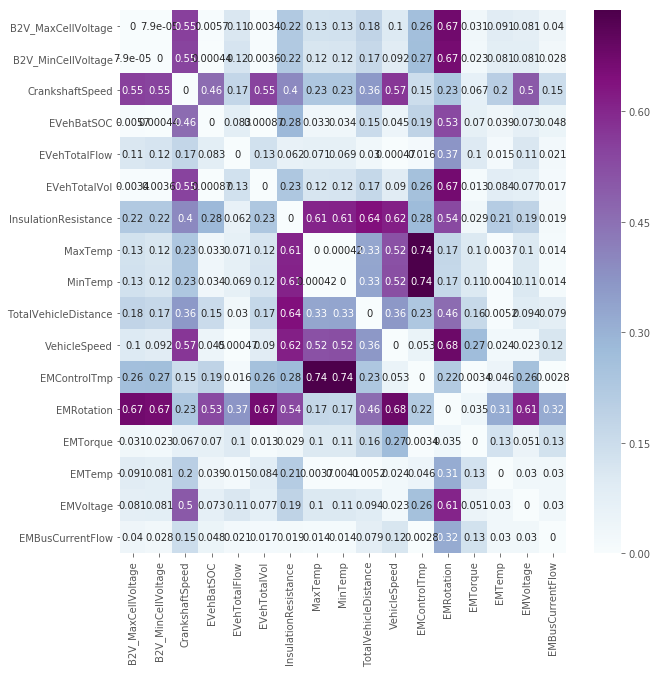

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(dataset[dataset['BrakeSystemAlarm']==1][num_col].corr()-dataset[dataset['BrakeSystemAlarm']==0][num_col].corr()),
            annot=True,cmap="BuPu")

### Find 2: When Brake Alarm=1, the correlation between EMControlTemp and Max/Min Temp changes most

Text(0.5, 1.0, 'Red: Alarm=1, Blue: Alarm=0')

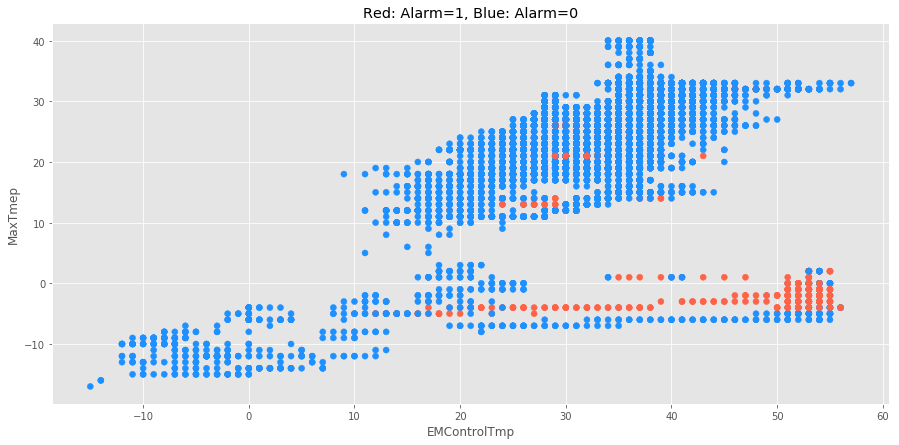

In [63]:
cdict={0:'dodgerblue',1:'tomato'}
plt.figure(figsize=(15,7))
plt.scatter(dataset.EMControlTmp,dataset.MaxTemp,color=[cdict[i] for i in dataset.BrakeSystemAlarm])
plt.xlabel('EMControlTmp')
plt.ylabel('MaxTmep')
plt.title("Red: Alarm=1, Blue: Alarm=0")

Corrlation between B2V_Max and EMrotation also changed, but deosn't show obivious trend as previous 

Text(0.5, 1.0, 'Red: Alarm=1, Blue: Alarm=0')

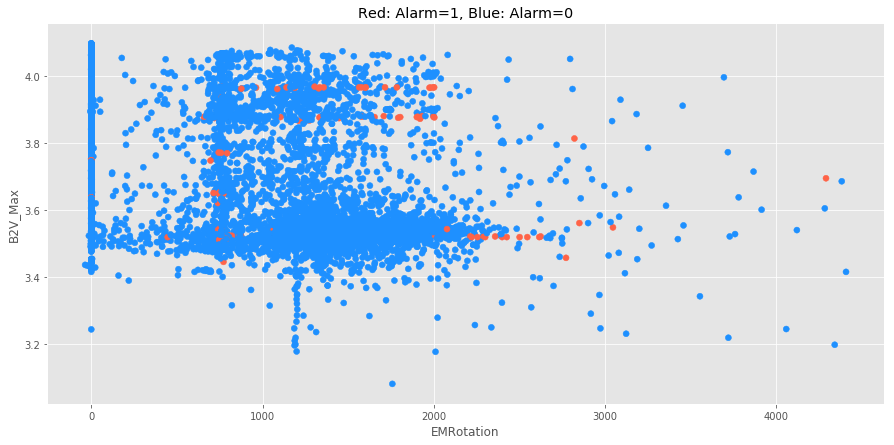

In [64]:
cdict={0:'dodgerblue',1:'tomato'}
plt.figure(figsize=(15,7))
plt.scatter(dataset.EMRotation,dataset.B2V_MaxCellVoltage,color=[cdict[i] for i in dataset.BrakeSystemAlarm])
plt.xlabel('EMRotation')
plt.ylabel('B2V_Max')
plt.title("Red: Alarm=1, Blue: Alarm=0")

## 3. Initial Modeling

Train, Test split shouldn't simply done by random selection, because datasets have different vehicle

I split based on vehicle and Brake Alarm=1 number roughly, about 80-20 split:
12 vehicle (8 has Brake Alarm) in training set, and 3 (2 has Alarm) in testing set

In [65]:
test=dataset[dataset.vin.isin (['car_id_1', 'car_id_2','car_id_8'])]
train=dataset[dataset.vin.isin ([ 'car_id_3', 'car_id_4', 'car_id_5', 'car_id_6', 'car_id_7', 'car_id_9', 'car_id_10',
       'car_id_11', 'car_id_12', 'car_id_13', 'car_id_14', 'car_id_15'])]

Label Encoder for categorical

In [67]:
from collections import defaultdict
from sklearn import preprocessing
d = defaultdict(preprocessing.LabelEncoder)
fit = train[['ActTransmissionGearLeverPos','geo_status']].apply(lambda x: d[x.name].fit_transform(x))

In [68]:
col=[ 'B2V_MaxCellVoltage',  'CrankshaftSpeed',  'EVehBatSOC', 'EVehTotalFlow',
          'EVehTotalVol', 'InsulationResistance', 'MaxTemp', 
          'VehicleSpeed', 'EMControlTmp', 'EMRotation', 'EMTorque', 'EMTemp', 'EMVoltage', 'EMBusCurrentFlow','B2V_gap','Temp_gap',
    'DC_DC_Sts','VehBrakeSts','VehChargingSts','VehDriveSts', 'VehRunMode','VehicleStatus',
             'engine_state','EMsts' ]

train_model=pd.concat([train[col],fit],axis=1)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=13)
model.fit(train_model,train['BrakeSystemAlarm'])

print('Train Accuracy of RF model is {0:.2f}'.format(metrics.accuracy_score(train['BrakeSystemAlarm'],model.predict(train_model))))

Train Accuracy of RF model is 0.99


In [80]:
pd.crosstab(model.predict(train_model),train['BrakeSystemAlarm'],margins=True,rownames=['predict'])

BrakeSystemAlarm,0,1,All
predict,,,
0,10076,101,10177
1,0,278,278
All,10076,379,10455


In [85]:
precision=278/278
recall=278/379
print("Train Precison: {0:.2f}".format(precision))
print("Train Recall: {0:.2f}".format(recall))

Train Precison: 1.00
Train Recall: 0.73


In [83]:
fit_test=test[['ActTransmissionGearLeverPos','geo_status']].apply(lambda x: d[x.name].transform(x))
test_model=pd.concat([test[col],fit_test],axis=1)
print('Test Accuracy of RF model is {0:.2f}'.format(metrics.accuracy_score(test['BrakeSystemAlarm'],model.predict(test_model))))

Test Accuracy of RF model is 0.99


In [84]:
pd.crosstab(model.predict(test_model),test['BrakeSystemAlarm'],margins=True,rownames=['predict'])

BrakeSystemAlarm,0,1,All
predict,,,
0,2387,19,2406
1,0,62,62
All,2387,81,2468


In [86]:
precision=62/62
recall=62/81
print("Test Precison: {0:.2f}".format(precision))
print("Test Recall: {0:.2f}".format(recall))

Test Precison: 1.00
Test Recall: 0.77


The model shows descent performance, but Recall value is not very high. It has certain False Negative.

10 fold cross validation shows the average recall is about 0.63

In [95]:
all_model=pd.concat([train_model,test_model],axis=0)
y=pd.concat([train['BrakeSystemAlarm'],test['BrakeSystemAlarm']],axis=0)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,all_model,y, cv = 10,scoring = "recall")
print("Average Recall is {0:.2f}".format(cv_result.mean()))

cv_result = cross_val_score(model,all_model,y, cv = 10,scoring = "accuracy")
print("Average Accuracy is {0:.2f}".format(cv_result.mean()))

Average Recall is 0.63
Average Accuracy is 0.98


## Find 3: Most important variables related to Brake Alarm are EMControlTmp, MaxTemp, VehicleSpeed, EMRotation

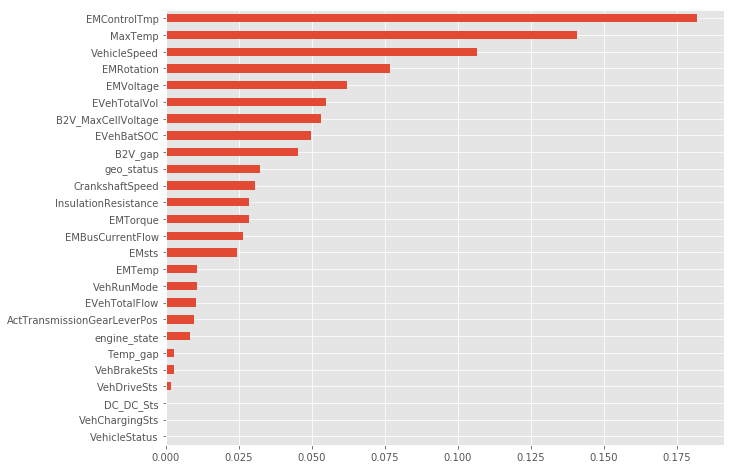

In [82]:
pd.Series(model.feature_importances_,index=train_model.columns).sort_values().plot(kind='barh',figsize=(10,8))

# 4. Improving Model Performance 

## 4.1 Other Algorithm 

Gradient Boosting tree model shows similar performance (0.98) to RF model, with higher Recall value (0.81 vs 0.63)

But Gradient Boosting model takes longer time to train 

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=100,random_state=13,max_depth=5,learning_rate=0.1)

cv_result = cross_val_score(grad,all_model,y, cv = 10,scoring = "recall")
print("Average Recall is {0:.2f}".format(cv_result.mean()))

cv_result = cross_val_score(grad,all_model,y, cv = 10,scoring = "accuracy")
print("Average Accuracy is {0:.2f}".format(cv_result.mean()))


Average Recall is 0.81
Average Accuracy is 0.98


## 4.2 Adding new variable to Random Forest model

I was thinking maybe Alarm is not only about current status, but also related to trend or changing speed. 

So I created a new variable to show how much Vehichle Speed changes per minute.

Adding this variable to RF model, increase the Recall by 0.02, with same overall accuary. 

Feature Engineering can improve the performance of original model

In [99]:
dataset['timediff_cat']=np.where(dataset['timediff']<=30,1,0)

dataset['speed_delta']=dataset.groupby('vin').VehicleSpeed.diff()
dataset['speed_delta']=dataset['speed_delta']/dataset['timediff']

dataset['speed_delta']=dataset['speed_delta']*dataset['timediff_cat']*60

dataset=dataset.dropna()

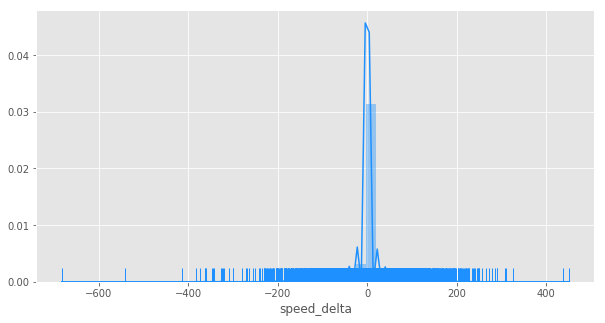

In [110]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['speed_delta'],rug=True,color='dodgerblue')

In [103]:
all_fit=dataset[['ActTransmissionGearLeverPos','geo_status']].apply(lambda x: d[x.name].transform(x))
col_new=[ 'B2V_MaxCellVoltage',  'CrankshaftSpeed',  'EVehBatSOC', 'EVehTotalFlow',
          'EVehTotalVol', 'InsulationResistance', 'MaxTemp', 
          'VehicleSpeed', 'EMControlTmp', 'EMRotation', 'EMTorque', 'EMTemp', 'EMVoltage', 'EMBusCurrentFlow','B2V_gap','Temp_gap',
    'DC_DC_Sts','VehBrakeSts','VehChargingSts','VehDriveSts', 'VehRunMode','VehicleStatus',
             'engine_state','EMsts','speed_delta' ]

all_model_new=pd.concat([dataset[col_new],all_fit],axis=1)

In [104]:
model_new=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=13)
cv_result = cross_val_score(model_new,all_model_new,dataset['BrakeSystemAlarm'], cv = 10,scoring = "recall")
print("Average Recall is {0:.2f}".format(cv_result.mean()))

cv_result = cross_val_score(grad,all_model,dataset['BrakeSystemAlarm'], cv = 10,scoring = "accuracy")
print("Average Accuracy is {0:.2f}".format(cv_result.mean()))

Average Recall is 0.65
Average Accuracy is 0.98


# 5. Possible Root Causes

Based on Find 1,2,3, I believe the root causes is related to Electric Motor

Variables related to Electric Motor like EMControlTmp, EMRotation shows high importances in RF model. And relationship between Max/Min Temp and EMControlTmp also change when Alarm is on. 

So inverstigation about EM should be done first. 

# 6. Next Step

Due to the time constrain, I only did simply EDA works and chose a simply RF model. If more time is given, I think next three things is necessary:

6.1 More data is needed to develop more robust model

6.2 Further method should be used to address imbalance data problem

6.3 Model can be further tuned, and better algorithms can be used



